In [48]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

In [49]:
import FinanceDataReader as fdr

apple = fdr.DataReader('AAPL', '2010')
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422666,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400


<AxesSubplot:xlabel='Date'>

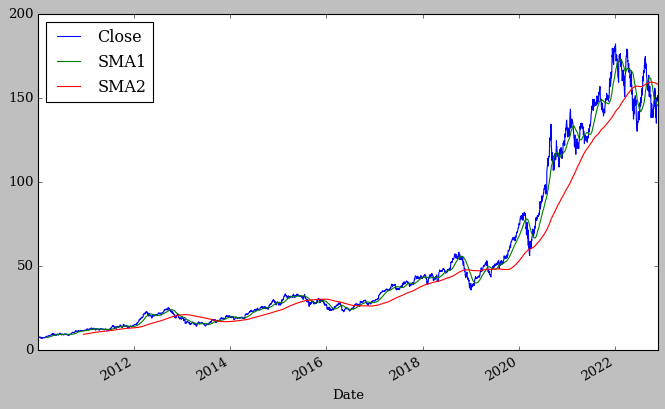

In [50]:
# 단기 이동평균선(42) 과 장기 이동평균선 계산(252)

SMA1 = 42
SMA2 = 242

# 이동평균선 계산
apple['SMA1'] = apple['Close'].rolling(SMA1).mean()
apple['SMA2'] = apple['Close'].rolling(SMA2).mean()

# 시각화
apple = apple[['Close', 'SMA1', 'SMA2']]
apple.plot(figsize=(10,6))

In [51]:
apple.dropna(inplace=True)

apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)
apple

C:\Users\an373\AppData\Local\Temp\ipykernel_16168\2011923027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_16168\2011923027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)


,Close,SMA1,SMA2,Position
Date,,,,
2010-12-16,11.473214,11.179039,9.185782,1
2010-12-17,11.450357,11.188495,9.201514,1
2010-12-20,11.507500,11.198427,9.217428,1
2010-12-21,11.578571,11.210910,9.234138,1
2010-12-22,11.612857,11.225952,9.251048,1
...,...,...,...,...
2022-11-15,150.039993,145.898094,158.284132,-1
2022-11-16,148.789993,145.762618,158.218099,-1
2022-11-17,150.720001,145.615475,158.164215,-1


(-1.2, 1.2)

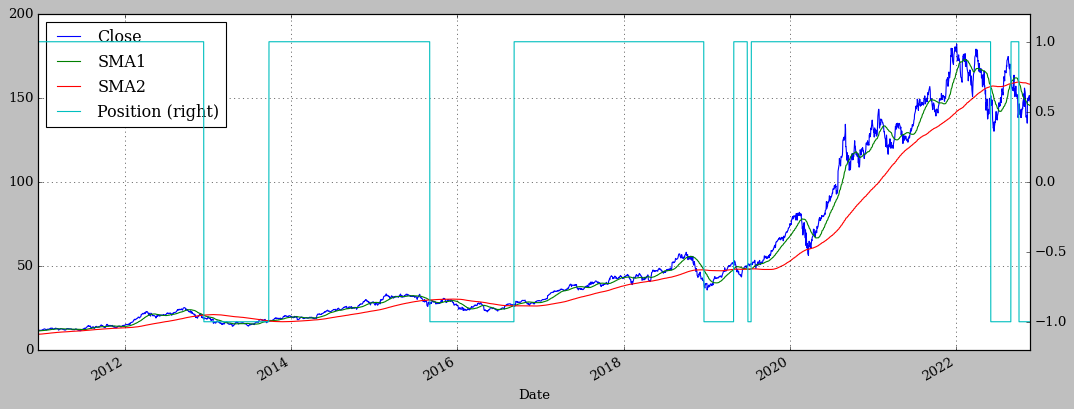

In [52]:
ax = apple.plot(secondary_y = 'Position', figsize=(16,6), grid=True)
plt.ylim(-1.2,1.2)

# 백테스팅

In [53]:
apple['Returns'] = np.log(apple['Close'] / apple['Close'].shift(1))
apple['Strategy'] = apple['Position'].shift(1) * apple['Returns']

C:\Users\an373\AppData\Local\Temp\ipykernel_16168\1913815698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Returns'] = np.log(apple['Close'] / apple['Close'].shift(1))
C:\Users\an373\AppData\Local\Temp\ipykernel_16168\1913815698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Strategy'] = apple['Position'].shift(1) * apple['Returns']


In [56]:
# 단리 수익률 계산
np.exp(apple[['Returns', 'Strategy']].sum())

Returns     12.900482
Strategy     7.700809
dtype: float64

In [59]:
# 변동성 계산
apple[['Returns', 'Strategy']].std() *252 **0.5

Returns     0.288278
Strategy    0.288393
dtype: float64

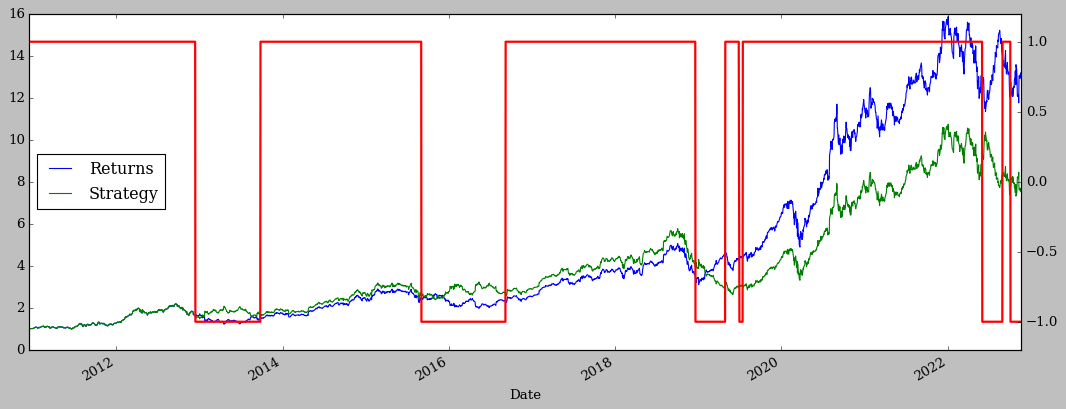

In [86]:
ax = apple[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16,6))
apple['Position'].plot(ax=ax, secondary_y='Position', lw=2)
plt.ylim(-1.2,1.2)
ax.legend(loc='center left')

In [96]:
# 최적화
from itertools import product

sma1 = range(20,61,4)
sma2 = range(180, 281, 10)

results = pd.DataFrame()

apple = fdr.DataReader('AAPL', '2010')
for SMA1, SMA2 in product(sma1, sma2) :
    data = apple[['Close']]
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['SMA1'] = data['Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns'] 
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame({
        'SMA1' : SMA1,
        'SMA2' : SMA2,
        'MARKET' : perf['Returns'],
        'STRATEGY' : perf['Strategy'],
        'OUT' : perf['Strategy'] - perf['Returns']
    }, index=[0]), ignore_index=True)

results

C:\Users\an373\AppData\Local\Temp\ipykernel_16168\3021967380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_16168\3021967380.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
C:\Users\an373\AppData\Local\Temp\ipykernel_16168\3021967380.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,14.632207,4.881700,-9.750507
1,20,190,14.873240,5.390712,-9.482528
2,20,200,13.032326,6.942551,-6.089776
3,20,210,13.624433,8.156539,-5.467894
4,20,220,13.497525,8.580876,-4.916649
...,...,...,...,...,...
116,60,240,12.939148,7.704186,-5.234962
117,60,250,12.740262,7.126639,-5.613623
118,60,260,12.032634,6.755371,-5.277264
119,60,270,12.075056,5.682288,-6.392768


In [97]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
101,56,200,13.032326,13.353579,0.321252
111,60,190,14.873240,14.121991,-0.751249
112,60,200,13.032326,11.334197,-1.698130
56,40,190,14.873240,12.693770,-2.179470
110,60,180,14.632207,12.321889,-2.310318
100,56,190,14.873240,12.210503,-2.662737
91,52,210,13.624433,10.945795,-2.678638
